In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-student-management-dataset/college_student_management_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/college-student-management-dataset/college_student_management_data.csv')

In [3]:
df.head()

,student_id,age,gender,major,GPA,course_load,avg_course_grade,attendance_rate,enrollment_status,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate,risk_level
0,S001,24,Other,Computer Science,2.42,5,67.2,0.71,Graduated,32,33,0.70,8,0.74,High
1,S002,21,Male,Arts,3.73,6,64.4,0.84,Leave,29,53,0.91,13,0.85,Medium
2,S003,22,Male,Computer Science,2.80,3,95.3,0.89,Graduated,34,69,0.58,18,0.99,Medium
3,S004,24,Male,Arts,2.59,4,73.7,0.98,Graduated,22,18,0.91,6,0.72,Medium
4,S005,20,Other,Computer Science,2.30,4,87.4,0.95,Active,9,11,0.77,15,0.76,High


In [4]:
df.tail()

,student_id,age,gender,major,GPA,course_load,avg_course_grade,attendance_rate,enrollment_status,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate,risk_level
1540,S1541,24,Male,Business,3.61,6,70.5,0.77,Leave,26,64,0.87,13,0.51,Medium
1541,S1542,24,Other,Business,2.80,4,77.4,0.96,Graduated,12,19,0.61,2,0.55,Medium
1542,S1543,21,Male,Computer Science,3.61,5,66.3,0.99,Leave,1,89,0.92,18,0.65,Low
1543,S1544,22,Male,Arts,3.18,4,97.9,0.85,Graduated,20,15,0.71,19,0.78,Low
1544,S1545,25,Other,Engineering,2.33,4,90.7,0.66,Leave,32,57,0.52,10,0.53,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    1545 non-null   object 
 1   age                           1545 non-null   int64  
 2   gender                        1545 non-null   object 
 3   major                         1545 non-null   object 
 4   GPA                           1545 non-null   float64
 5   course_load                   1545 non-null   int64  
 6   avg_course_grade              1545 non-null   float64
 7   attendance_rate               1545 non-null   float64
 8   enrollment_status             1545 non-null   object 
 9   lms_logins_past_month         1545 non-null   int64  
 10  avg_session_duration_minutes  1545 non-null   int64  
 11  assignment_submission_rate    1545 non-null   float64
 12  forum_participation_count     1545 non-null   int64  
 13  vid

In [6]:
df.describe()

,age,GPA,course_load,avg_course_grade,attendance_rate,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,21.482848,3.012324,4.487379,79.914887,0.794460,19.344984,49.365049,0.752201,9.642718,0.750958
std,2.300287,0.571395,1.098163,11.528625,0.115142,11.515003,23.195192,0.144351,5.752493,0.144840
min,18.000000,2.000000,3.000000,60.000000,0.600000,0.000000,10.000000,0.500000,0.000000,0.500000
25%,19.000000,2.520000,4.000000,69.900000,0.690000,10.000000,29.000000,0.630000,5.000000,0.620000
50%,22.000000,3.030000,5.000000,79.600000,0.790000,19.000000,49.000000,0.760000,10.000000,0.750000
75%,23.000000,3.510000,5.000000,89.700000,0.890000,29.000000,70.000000,0.880000,15.000000,0.880000
max,25.000000,4.000000,6.000000,100.000000,1.000000,39.000000,89.000000,1.000000,19.000000,1.000000


In [7]:
df.isnull().sum()

student_id                      0
age                             0
gender                          0
major                           0
GPA                             0
course_load                     0
avg_course_grade                0
attendance_rate                 0
enrollment_status               0
lms_logins_past_month           0
avg_session_duration_minutes    0
assignment_submission_rate      0
forum_participation_count       0
video_completion_rate           0
risk_level                      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

student_id                       object
age                               int64
gender                           object
major                            object
GPA                             float64
course_load                       int64
avg_course_grade                float64
attendance_rate                 float64
enrollment_status                object
lms_logins_past_month             int64
avg_session_duration_minutes      int64
assignment_submission_rate      float64
forum_participation_count         int64
video_completion_rate           float64
risk_level                       object
dtype: object

In [10]:
df.shape

(1545, 15)

In [11]:
df.columns

Index(['student_id', 'age', 'gender', 'major', 'GPA', 'course_load',
       'avg_course_grade', 'attendance_rate', 'enrollment_status',
       'lms_logins_past_month', 'avg_session_duration_minutes',
       'assignment_submission_rate', 'forum_participation_count',
       'video_completion_rate', 'risk_level'],
      dtype='object')

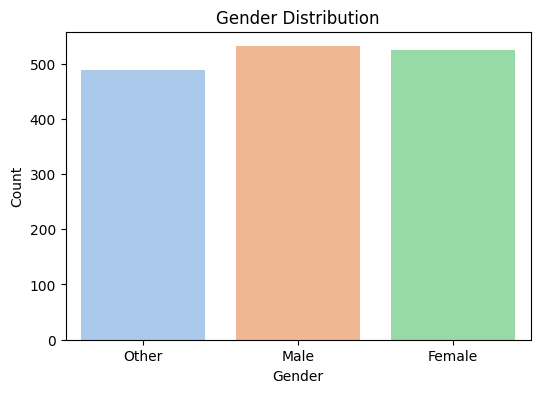

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

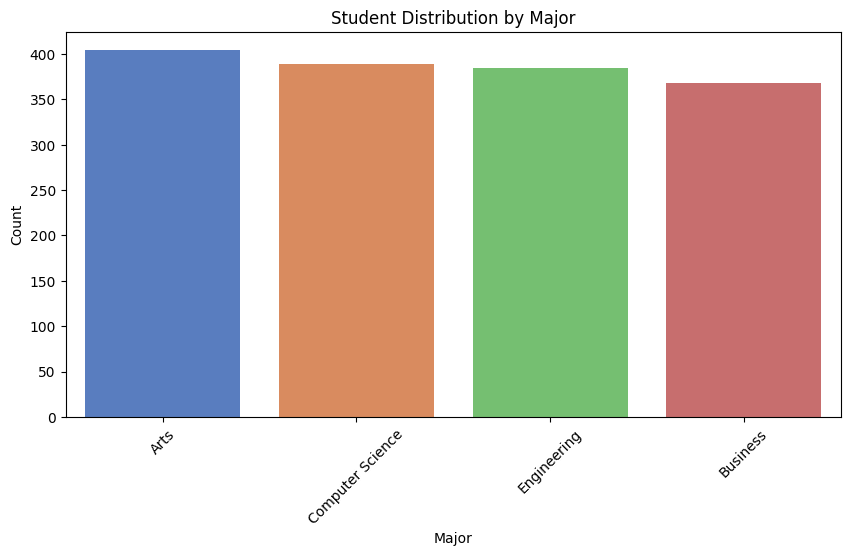

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='major', order=df['major'].value_counts().index, palette='muted')
plt.title("Student Distribution by Major")
plt.xlabel("Major")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

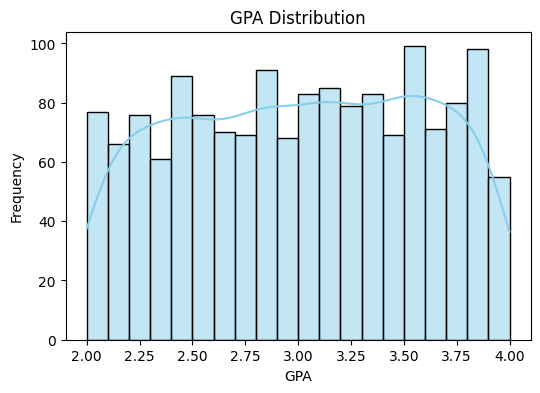

In [14]:
plt.figure(figsize=(6, 4))
sns.histplot(df['GPA'], bins=20, kde=True, color='skyblue')
plt.title("GPA Distribution")
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.show()

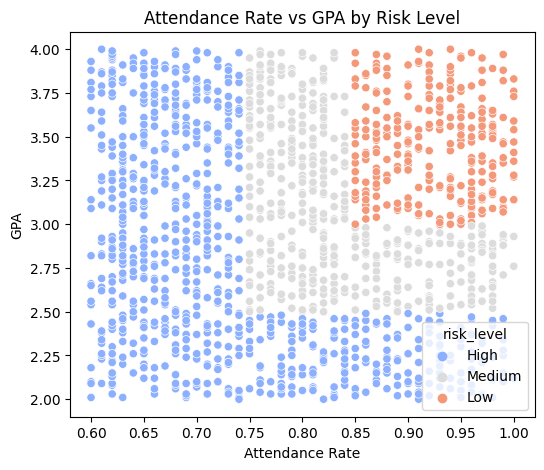

In [15]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='attendance_rate', y='GPA', hue='risk_level', palette='coolwarm')
plt.title("Attendance Rate vs GPA by Risk Level")
plt.xlabel("Attendance Rate")
plt.ylabel("GPA")
plt.show()

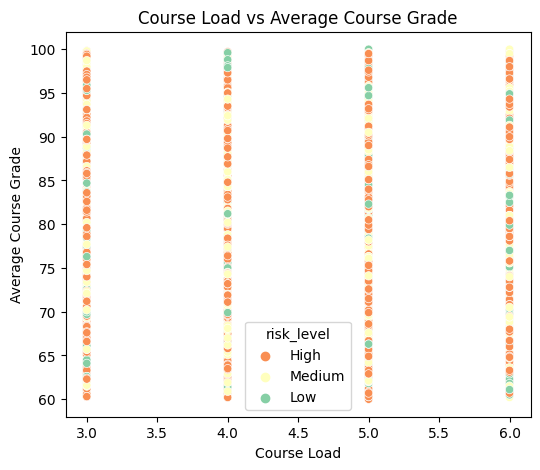

In [16]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='course_load', y='avg_course_grade', hue='risk_level', palette='Spectral')
plt.title("Course Load vs Average Course Grade")
plt.xlabel("Course Load")
plt.ylabel("Average Course Grade")
plt.show()


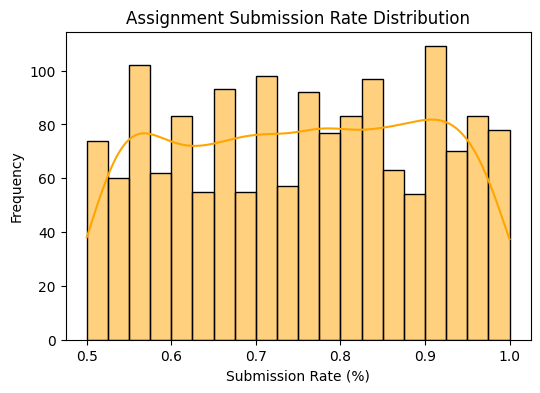

In [17]:
plt.figure(figsize=(6, 4))
sns.histplot(df['assignment_submission_rate'], bins=20, kde=True, color='orange')
plt.title("Assignment Submission Rate Distribution")
plt.xlabel("Submission Rate (%)")
plt.ylabel("Frequency")
plt.show()


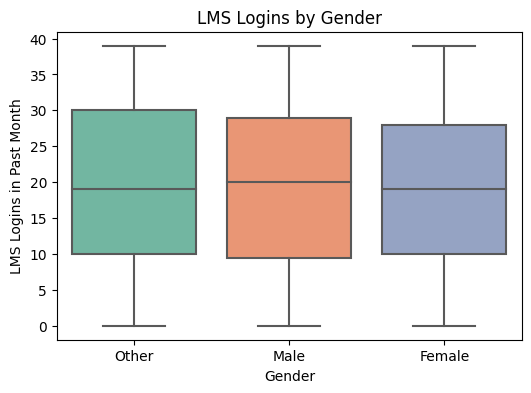

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='gender', y='lms_logins_past_month', palette='Set2')
plt.title("LMS Logins by Gender")
plt.xlabel("Gender")
plt.ylabel("LMS Logins in Past Month")
plt.show()

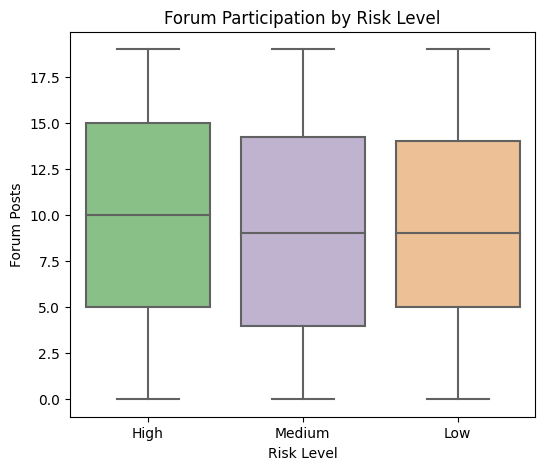

In [19]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='risk_level', y='forum_participation_count', palette='Accent')
plt.title("Forum Participation by Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Forum Posts")
plt.show()

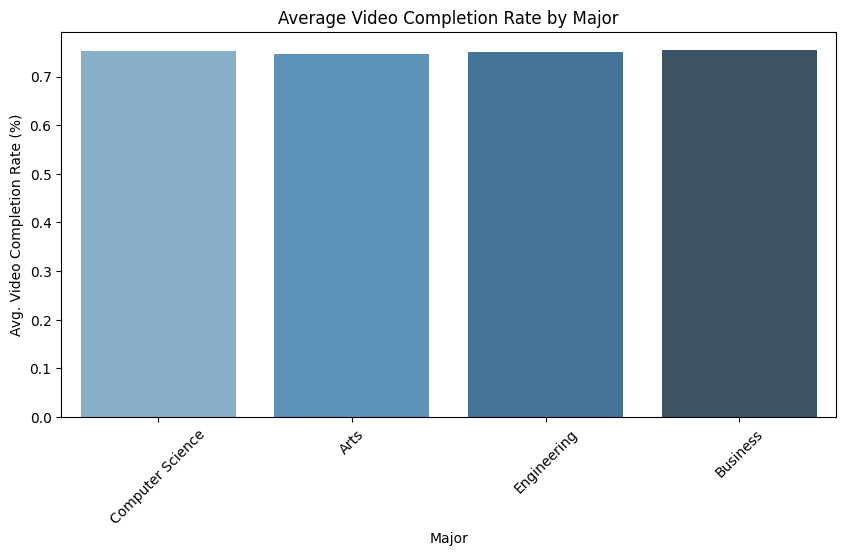

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='major', y='video_completion_rate', estimator='mean', ci=None, palette='Blues_d')
plt.title("Average Video Completion Rate by Major")
plt.xlabel("Major")
plt.ylabel("Avg. Video Completion Rate (%)")
plt.xticks(rotation=45)
plt.show()


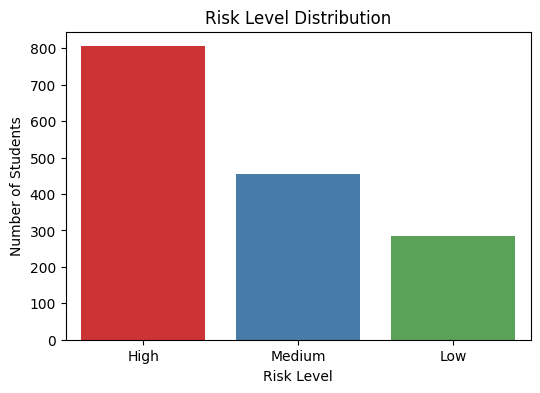

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='risk_level', palette='Set1')
plt.title("Risk Level Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Number of Students")
plt.show()

## Predictive modeling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
# Drop 'student_id' (non-numeric identifier)
df = df.drop('student_id', axis=1)

# Label encode categorical features
le = LabelEncoder()
categorical_cols = ['gender', 'major', 'enrollment_status', 'risk_level']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [24]:
# Define features (X) and target (y)
X = df.drop('risk_level', axis=1)
y = df['risk_level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}


In [25]:
# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    results[name] = round(accuracy * 100, 2)

# Display results
print("Model Accuracies (%):")
for name, acc in results.items():
    print(f"{name}: {acc}%")

Model Accuracies (%):
Logistic Regression: 77.99%
Decision Tree: 100.0%
Random Forest: 100.0%
Support Vector Machine: 58.9%
K-Nearest Neighbors: 48.87%
Naive Bayes: 89.32%
Gradient Boosting: 100.0%


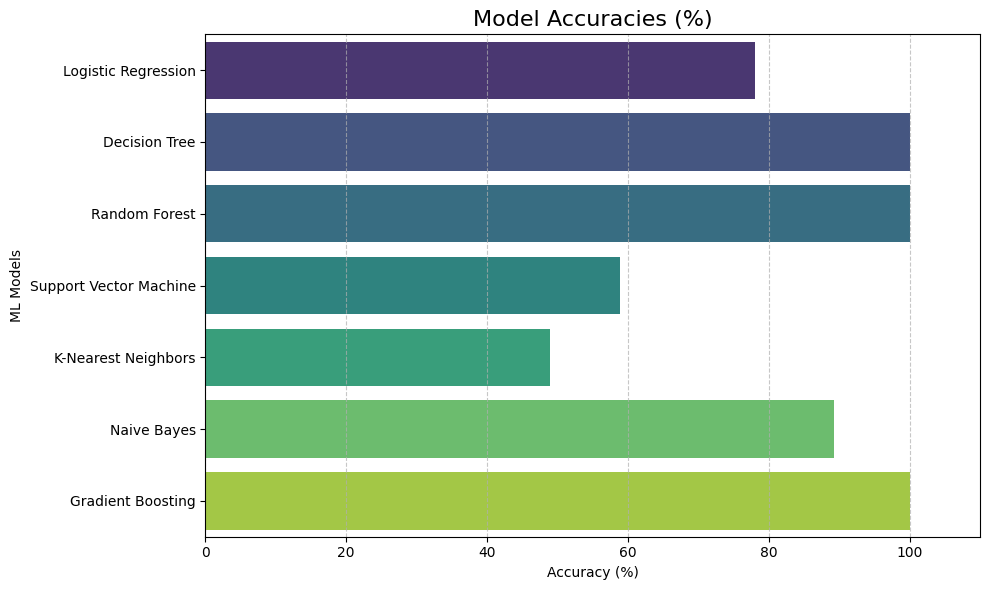

In [26]:
results = {
    'Logistic Regression': 77.99,
    'Decision Tree': 100.0,
    'Random Forest': 100.0,
    'Support Vector Machine': 58.9,
    'K-Nearest Neighbors': 48.87,
    'Naive Bayes': 89.32,
    'Gradient Boosting': 100.0
}

# Convert to DataFrame for plotting
import pandas as pd
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Accuracies (%)", fontsize=16)
plt.xlabel("Accuracy (%)")
plt.ylabel("ML Models")
plt.xlim(0, 110)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()